In [81]:
import gymnasium as gym
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [74]:
environment = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False, render_mode="ansi")
environment.reset()

(0, {'prob': 1})

In [75]:
nb_of_states = environment.observation_space.n
nb_actions = environment.action_space.n
qtable = np.zeros([nb_of_states, nb_actions])

In [76]:
episodes = 10000
alpha = 0.5
gamma = 0.9

In [77]:
outcomes = []

In [78]:
for _ in range(episodes):

    state, _ = environment.reset()
    done = False

    outcomes.append("Failure")

    while not done:
        if np.max(qtable[state]) > 0:
            action = np.argmax(qtable[state])
        else:
            action = environment.action_space.sample()
        new_state, reward, done, info, _ = environment.step(action)

        qtable[state, action] = qtable[state, action] + alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])

        state = new_state

        if reward:
            outcomes[-1] = "Success"

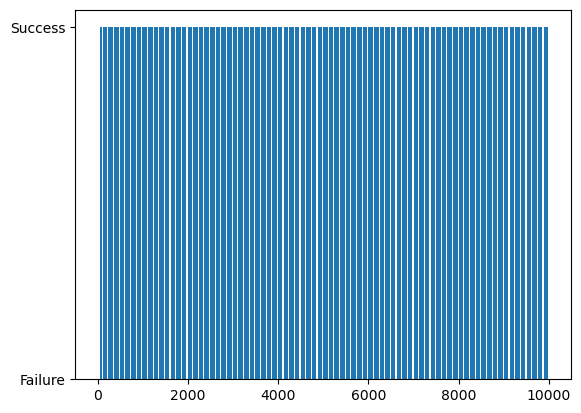

In [80]:
plt.bar(range(episodes), outcomes);

In [84]:
episodes = 100
nb_successes = 0

In [85]:
for _ in range(episodes):
    state, _ = environment.reset()
    done = False

    while not done:
        if np.max(qtable[state]) > 0:
            action = np.argmax(qtable[state])
        else:
            action = environment.action_space.sample()
        new_state, reward, done, info, _ = environment.step(action)
        state = new_state
        nb_successes += reward

print(f"Success rate: {(nb_successes / episodes) * 100}%")

Success rate: 100.0%
